<a href="https://colab.research.google.com/github/Kavindulakmal/Tomato/blob/main/Training/Potato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Install Kaggle
!pip install -q Kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lakmaltkavindu","key":"2a85e9aa8f93d76bc99a11ce00610cf7"}'}

In [5]:
#Create a Kaggle folder
!mkdir ~/.kaggle

In [6]:
#Copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [7]:
#permission for json file for act
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 98% 321M/329M [00:06<00:00, 26.9MB/s]
100% 329M/329M [00:06<00:00, 49.8MB/s]


In [11]:
!unzip plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [12]:
#dataset successfully imported

In [13]:
#import matplotlib
!pip install matplotlib

In [14]:
#import libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,

)

Found 20638 files belonging to 15 classes.


In [17]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [18]:
#Check length
len(dataset)

645

In [19]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[14  9  1  2  5  5  5 12 14  1  9  9  1 11 11  5 10 10 11 11  0 12  7 10
  7  1  4 10 12 11  2  2]


In [20]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])


tf.Tensor(
[[[201. 191. 202.]
  [186. 176. 187.]
  [194. 184. 195.]
  ...
  [179. 165. 178.]
  [ 98.  84.  97.]
  [117. 103. 116.]]

 [[199. 189. 200.]
  [184. 174. 185.]
  [188. 178. 189.]
  ...
  [162. 148. 161.]
  [ 92.  78.  91.]
  [122. 108. 121.]]

 [[196. 186. 197.]
  [181. 171. 182.]
  [180. 170. 181.]
  ...
  [130. 116. 129.]
  [126. 112. 125.]
  [125. 111. 124.]]

 ...

 [[143. 127. 140.]
  [140. 124. 137.]
  [140. 124. 137.]
  ...
  [103.  82.  91.]
  [ 93.  72.  81.]
  [ 75.  54.  63.]]

 [[147. 131. 144.]
  [143. 127. 140.]
  [144. 128. 141.]
  ...
  [101.  80.  89.]
  [ 90.  69.  78.]
  [ 73.  52.  61.]]

 [[142. 126. 139.]
  [138. 122. 135.]
  [140. 124. 137.]
  ...
  [ 76.  55.  64.]
  [ 81.  60.  69.]
  [ 88.  67.  76.]]], shape=(256, 256, 3), dtype=float32)


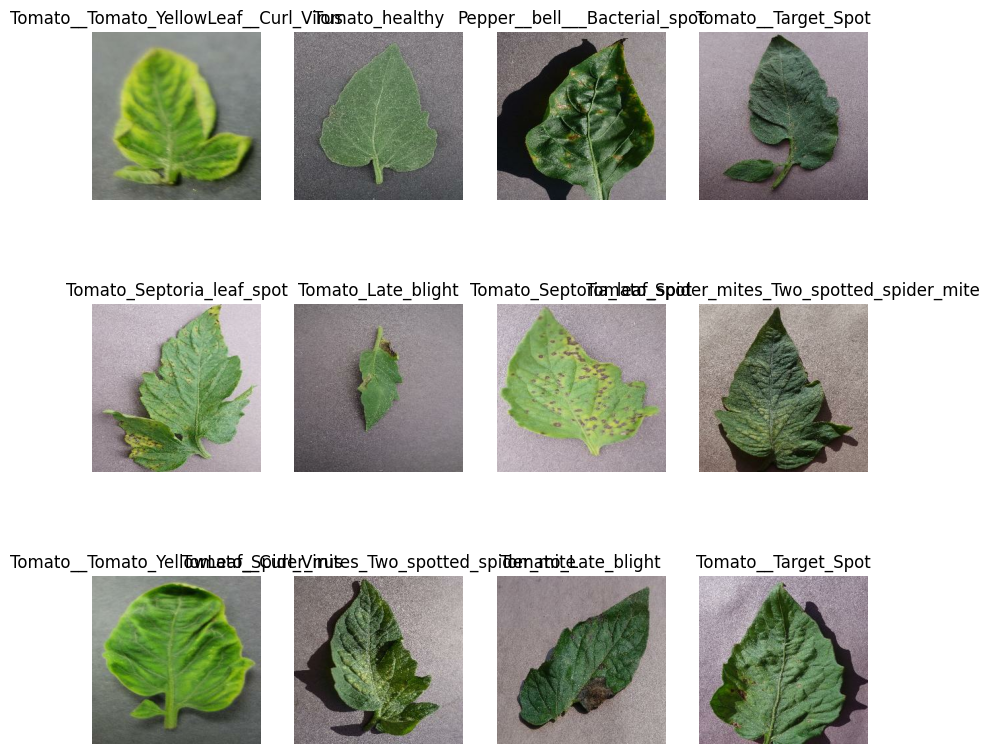

In [27]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [28]:
len(dataset)

645

In [30]:
'''
80% -> Training
20% -> 10% = Validation, 10% = Testing

'''

train_size = 0.8
len(dataset)*train_size

516.0

In [31]:
train_ds = dataset.take(516)
len(train_ds)

516

In [32]:
test_ds = dataset.skip(516)
len(test_ds)

129

In [33]:
val_size = 0.1
len(dataset)*val_size

64.5

In [34]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [35]:
test_ds = test_ds.skip(64)
len(test_ds)

65